In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

# Glossary of Dataset

In [2]:
# ArrDelay (how early/late the plane was at its final destination in minutes: our target variable)
# ActualElapsedTime: elapsed time of flight, in minutes
# AirTime: flight time, in minutes
# ArrDelay, DepDelay: arrival and departure delays, in minutes

# CRSDepTime (the local time the plane was scheduled to depart)
# CRSArrTime (the local time the plane was scheduled to arrive)
# CRSElapsedTime (the scheduled difference between departure and arrival
# Cancelled: cancelled indicator: 1 = Yes, 0 = No
# CancellationCode: reason for cancellation: A = carrier, B = weather, C = national air system, D = security


# Distance (how far did the plane travel for the route)
# DayOfWeek: day of week of departure, a value of 1-5 means that it is a weekday, a value of 6-7 means that it is a weekend day
# DepTime, ArrTime: departure and arrival times (in local time, hhmm)
# Distance: distance of flight, in miles
# Diverted: diverted indicator: 1 = Yes, 0 = No


# FlightNum: flight number



# Origin, Dest: origin and destination airport codes

# TailNum: airplane tail number
# TaxiIn, TaxiOut: taxi in and out times in minutes


# UniqueCarrier: unique abbreviation for a carrier

# Year, Month, DayofMonth: date of departure

# Reading and exploring Dataset

In [3]:
df=pd.read_csv('D:\\ML\\Project\\DelayedFlights.csv')
df2=pd.read_csv('D:\\ML\\Project\\airlines.csv')
df3=pd.read_csv('D:\\ML\\Project\\airports.csv')

In [4]:
df = df.drop('Unnamed: 0',axis=1)
df.head(4)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0


In [5]:
df2=pd.read_csv('D:\\ML\\Project\\airlines.csv')
df2

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [6]:
df3.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


# Check for null values

In [7]:
df.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

# Dropping columns having more than 70% null values

In [8]:
df_new=df.dropna(thresh=df.shape[0]*0.3,how='all',axis=1)
df_new.shape

(1936758, 29)

In [9]:
df_new.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

# Seperating Categorical and Numerical Features

In [10]:
df_cat = df_new.select_dtypes(exclude = ['int64','float64'])
df_num = df_new.select_dtypes(include = ['int64','float64'])

In [11]:
df_cat.shape,df_num.shape

((1936758, 5), (1936758, 24))

In [12]:
df_num.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
FlightNum                 0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

# Imputing Null Values

In [13]:
df_num_new=df_num.fillna({'ActualElapsedTime':df_num['ActualElapsedTime'].mean(),'CRSElapsedTime':df_num['CRSElapsedTime'].mean(),
                         'AirTime':df_num['AirTime'].mean(),'ArrDelay':df_num['ArrDelay'].mean(),'TaxiIn':df_num['TaxiIn'].mean(),
                         'TaxiOut':df_num['TaxiOut'].mean(),'CarrierDelay':df_num['CarrierDelay'].mean(),
                          'WeatherDelay':df_num['WeatherDelay'].mean(),'NASDelay':df_num['NASDelay'].mean(),
                         'SecurityDelay':df_num['SecurityDelay'].mean(),'LateAircraftDelay':df_num['LateAircraftDelay'].mean()})

In [14]:
df_num_new2=df_num_new.drop(['ArrTime'],axis=1)

In [15]:
df_num_new2.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [16]:
df_num_new2.isnull().sum().sum()

0

In [17]:
df_cat.isnull().sum()

UniqueCarrier       0
TailNum             5
Origin              0
Dest                0
CancellationCode    0
dtype: int64

In [18]:
df_cat1=df_cat.drop(['UniqueCarrier','TailNum','Origin','Dest'],axis=1)


In [19]:
df_cat1.isnull().sum()

CancellationCode    0
dtype: int64

# Encoding categorigal Variables

In [20]:
cat_encoded=pd.get_dummies(data=df_cat1,columns=['CancellationCode'])

# Combining the dataframe

In [21]:
df_final=pd.concat([cat_encoded,df_num_new2],axis=1)
df_final.shape

(1936758, 27)

In [22]:
df_final.head()

,CancellationCode_A,CancellationCode_B,CancellationCode_C,CancellationCode_N,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,0,0,1,2008,1,3,4,2003.0,1955,...,810,4.0,8.0,0,0,19.179399,3.703571,15.021635,0.090137,25.296466
1,0,0,0,1,2008,1,3,4,754.0,735,...,810,5.0,10.0,0,0,19.179399,3.703571,15.021635,0.090137,25.296466
2,0,0,0,1,2008,1,3,4,628.0,620,...,515,3.0,17.0,0,0,19.179399,3.703571,15.021635,0.090137,25.296466
3,0,0,0,1,2008,1,3,4,1829.0,1755,...,515,3.0,10.0,0,0,2.000000,0.000000,0.000000,0.000000,32.000000
4,0,0,0,1,2008,1,3,4,1940.0,1915,...,688,4.0,10.0,0,0,19.179399,3.703571,15.021635,0.090137,25.296466


In [23]:
df_final.isnull().sum().sum()

0

# EDA

# Proportion of USCarrier in the dataset

In [24]:
len(df['UniqueCarrier'].unique())

20

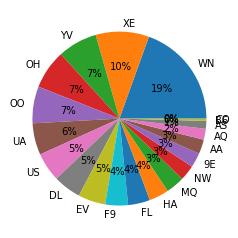

In [25]:
fig_dim=(20,20)
airline=df['UniqueCarrier'].unique()
size=df['UniqueCarrier'].value_counts()
plt.pie(size,labels=airline,autopct='%1.0f%%')
plt.show()

# Flights that got cancelled

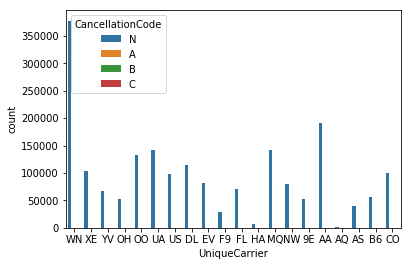

In [26]:
sns.countplot(x='UniqueCarrier',hue='CancellationCode',data=df_new)

<Figure size 1080x360 with 0 Axes>

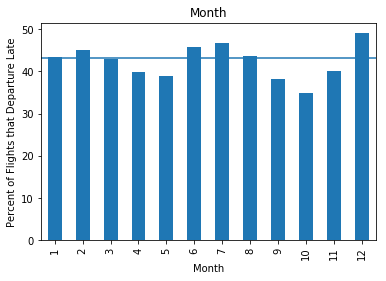

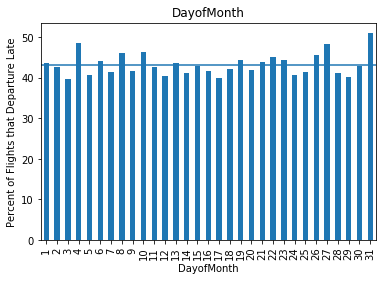

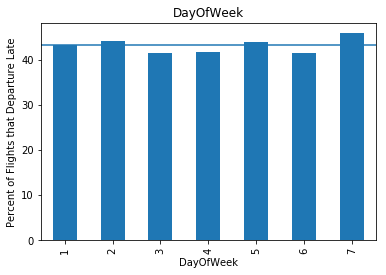

In [27]:
# Proportion of late flights per category based on all other flights
# enumerate(attributes) means print(list(attributes))[function takes a collection (e.g. a tuple) and returns it as an enumerate object.]
avgLate = np.sum(df_final['DepDelay'])/len(df_final['DepDelay'])
attributes = ['Month','DayofMonth','DayOfWeek']
for i,pred in enumerate(attributes):
    plt.figure(i, figsize=(15, 5))
    group = df_new.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'DepDelay']]
    group.sort_values(by=pred, inplace=True)    
    group.plot.bar(x=pred, y='DepDelay')
    plt.axhline(y=avgLate, label='Average')
    plt.ylabel('Percent of Flights that Departure Late')
    plt.title(pred)
    plt.legend().remove()

# Flights that got cancelled

In [28]:
##Here we simply select all the rows with cancelled flights and insert them into their own dataframe
cancelled = df_new[df_new['Cancelled']==1]
cancelled.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1542406,2008,10,27,1,1622.0,1420,NaN,1520,WN,27,...,NaN,19.0,1,A,0,NaN,NaN,NaN,NaN,NaN
1546593,2008,10,25,6,1323.0,1255,NaN,1442,XE,2347,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
1547161,2008,10,22,3,1825.0,1815,NaN,1927,XE,2819,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
1547178,2008,10,22,3,1733.0,1715,NaN,1818,XE,2890,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
1548271,2008,10,15,3,1943.0,1745,NaN,1857,XE,2117,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN


In [29]:
days_cancelled = cancelled['Cancelled'].groupby(df_new['DayOfWeek']).count()
days_cancelled

DayOfWeek
1     67
2    120
3    104
4     69
5    102
6     78
7     93
Name: Cancelled, dtype: int64

In [30]:
days_total = df_new['Cancelled'].groupby(df_new['DayOfWeek']).count()
days_total

DayOfWeek
1    290933
2    260943
3    262805
4    289451
5    323259
6    223256
7    286111
Name: Cancelled, dtype: int64

In [31]:
days_frac = np.divide(days_cancelled, days_total)
days_frac

DayOfWeek
1    0.000230
2    0.000460
3    0.000396
4    0.000238
5    0.000316
6    0.000349
7    0.000325
Name: Cancelled, dtype: float64

In [32]:
x=days_frac.index.values
x

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [33]:
days_frac*100

DayOfWeek
1    0.023029
2    0.045987
3    0.039573
4    0.023838
5    0.031554
6    0.034937
7    0.032505
Name: Cancelled, dtype: float64

In [37]:
ax.bar(x,days_frac*100, align='center')

<BarContainer object of 7 artists>

In [36]:
cancelled['Cancelled'].value_counts()

1    633
Name: Cancelled, dtype: int64

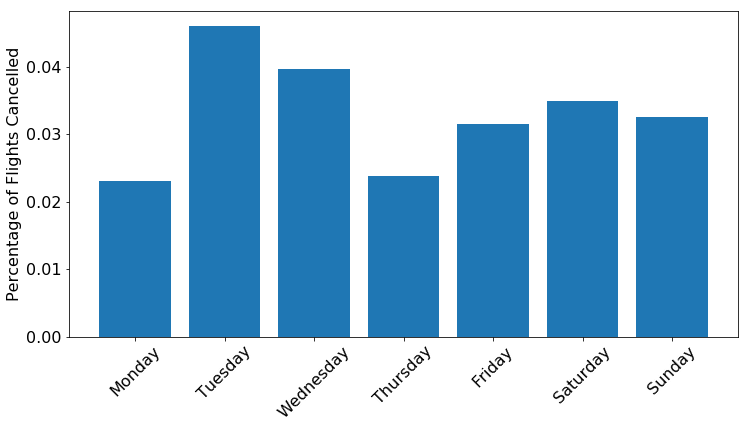

In [35]:
font = {'size'   : 16}
plt.rc('font', **font)### pass in the font dict as kwargs

days_cancelled = cancelled['Cancelled'].groupby(df_final['DayOfWeek']).count()
days_total = df_final['Cancelled'].groupby(df_final['DayOfWeek']).count()
days_frac = np.divide(days_cancelled, days_total)
x=days_frac.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(x,days_frac*100, align='center')
ax.set_ylabel('Percentage of Flights Cancelled')
ax.set_xticks(x)
ax.set_xticklabels(week, rotation = 45)

plt.show()

This shows that Tuesday has the highest percentage of cancelled flights, and Monday has the lowest.

# Feature Selection

In [38]:
df_final.columns

Index(['CancellationCode_A', 'CancellationCode_B', 'CancellationCode_C',
       'CancellationCode_N', 'Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'DepTime', 'CRSDepTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [39]:
dff=df_final.drop(['Year', 'Month', 'DayofMonth',
       'DayOfWeek', 'DepTime','FlightNum'],axis=1)


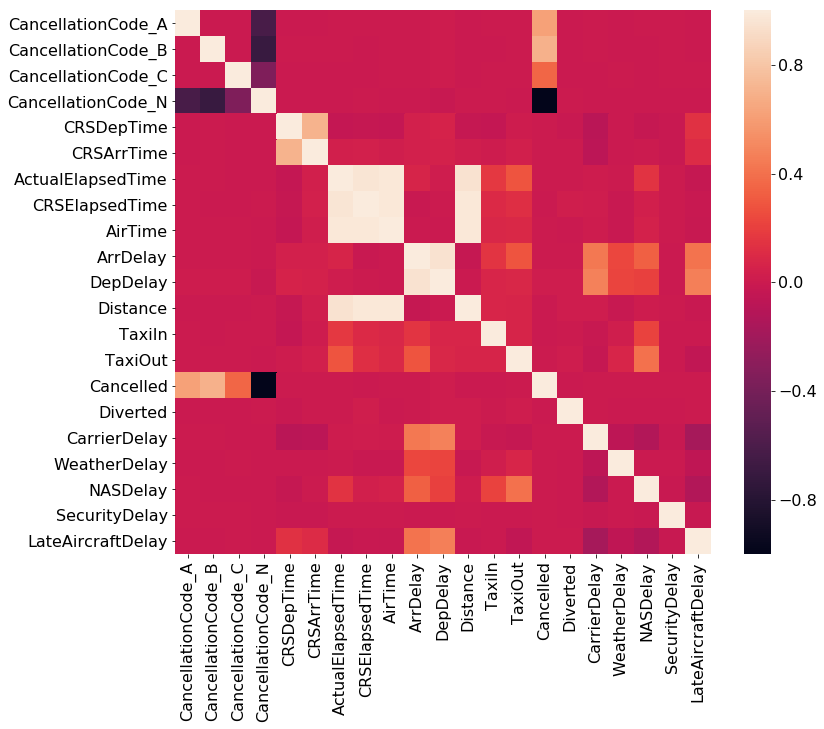

In [40]:
plt.figure(figsize=(12,10))
cor=dff.corr()
sns.heatmap(cor)
plt.show()

In [41]:
cor

,CancellationCode_A,CancellationCode_B,CancellationCode_C,CancellationCode_N,CRSDepTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
CancellationCode_A,1.000000e+00,-1.419134e-04,-7.243922e-05,-6.233361e-01,-0.002344,-0.001728,-3.995609e-18,0.000096,2.386513e-17,-2.730221e-18,...,-0.000430,5.249894e-17,0.000706,6.233361e-01,-7.145848e-04,3.451410e-16,-1.780198e-16,1.949266e-15,5.203939e-17,-2.903811e-16
CancellationCode_B,-1.419134e-04,1.000000e+00,-8.092491e-05,-6.963551e-01,0.002642,0.002456,5.921485e-17,-0.004127,4.341854e-17,-4.103585e-17,...,-0.005168,-9.931148e-16,0.001855,6.963551e-01,-7.982929e-04,5.838078e-16,-1.228114e-15,-2.092821e-15,5.441756e-16,-3.467257e-16
CancellationCode_C,-7.243922e-05,-8.092491e-05,1.000000e+00,-3.554521e-01,-0.000999,-0.001216,-9.920478e-17,-0.003098,8.704166e-17,-2.616243e-19,...,-0.003353,3.482518e-16,0.001011,3.554521e-01,-4.074859e-04,-2.670208e-16,3.583056e-17,-8.375067e-16,2.508178e-16,9.341265e-17
CancellationCode_N,-6.233361e-01,-6.963551e-01,-3.554521e-01,1.000000e+00,-0.000023,-0.000201,-7.573339e-17,0.003916,-3.090744e-16,-2.462409e-16,...,0.005060,5.988769e-15,-0.002091,-1.000000e+00,1.146388e-03,-1.221420e-15,-2.880507e-16,-4.205952e-16,-1.125586e-15,-1.358429e-16
CRSDepTime,-2.344105e-03,2.641653e-03,-9.993628e-04,-2.305380e-05,1.000000,0.710303,-3.484595e-02,-0.026387,-3.649897e-02,4.434680e-02,...,-0.029517,-3.231827e-02,0.011407,2.305380e-05,-9.096035e-03,-8.541723e-02,-7.431151e-03,-2.602259e-02,-1.357936e-02,1.334802e-01
CRSArrTime,-1.728126e-03,2.455603e-03,-1.215710e-03,-2.005906e-04,0.710303,1.000000,3.313074e-02,0.040112,2.585053e-02,4.298414e-02,...,0.024335,1.379330e-02,0.037938,2.005906e-04,9.065719e-04,-7.669054e-02,-4.013853e-03,7.359174e-03,-1.064682e-02,1.048530e-01
ActualElapsedTime,-3.995609e-18,5.921485e-17,-9.920478e-17,-7.573339e-17,-0.034846,0.033131,1.000000e+00,0.967599,9.766600e-01,6.812970e-02,...,0.949931,1.661182e-01,0.288367,1.244197e-17,3.709352e-16,8.038548e-03,3.281307e-03,1.429387e-01,4.615418e-03,-2.760090e-02
CRSElapsedTime,9.603212e-05,-4.126748e-03,-3.098361e-03,3.915927e-03,-0.026387,0.040112,9.675992e-01,1.000000,9.825087e-01,-1.561962e-02,...,0.981742,9.937646e-02,0.123815,-3.915927e-03,2.434413e-02,2.079714e-02,-1.288961e-02,3.673763e-02,4.774917e-03,-9.061788e-03
AirTime,2.386513e-17,4.341854e-17,8.704166e-17,-3.090744e-16,-0.036499,0.025851,9.766600e-01,0.982509,1.000000e+00,-1.889261e-04,...,0.977158,8.380996e-02,0.090023,-5.481650e-17,-4.817395e-16,1.561430e-02,-1.463875e-02,5.016042e-02,5.715933e-03,-1.757160e-02
ArrDelay,-2.730221e-18,-4.103585e-17,-2.616243e-19,-2.462409e-16,0.044347,0.042984,6.812970e-02,-0.015620,-1.889261e-04,1.000000e+00,...,-0.029757,1.560609e-01,0.285296,3.464519e-17,4.979952e-17,4.317916e-01,2.277170e-01,3.335476e-01,-2.141391e-03,4.114399e-01


In [42]:
cor_target = cor["DepDelay"]
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

ArrDelay             0.948431
DepDelay             1.000000
CarrierDelay         0.475102
WeatherDelay         0.219978
NASDelay             0.210520
LateAircraftDelay    0.461608
Name: DepDelay, dtype: float64

In [43]:
cor["DepDelay"]

CancellationCode_A    0.012919
CancellationCode_B    0.008169
CancellationCode_C    0.007870
CancellationCode_N   -0.016542
CRSDepTime            0.058875
CRSArrTime            0.053706
ActualElapsedTime     0.018405
CRSElapsedTime        0.007001
AirTime              -0.002740
ArrDelay              0.948431
DepDelay              1.000000
Distance             -0.007718
TaxiIn                0.074430
TaxiOut               0.078635
Cancelled             0.016542
Diverted              0.022867
CarrierDelay          0.475102
WeatherDelay          0.219978
NASDelay              0.210520
SecurityDelay        -0.002108
LateAircraftDelay     0.461608
Name: DepDelay, dtype: float64

# Model Building - train

# Linear Regression

In [44]:
x=dff[['ArrDelay','CarrierDelay','WeatherDelay','NASDelay','LateAircraftDelay']]
y=dff[['DepDelay']]

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [46]:
from sklearn.metrics import r2_score,mean_squared_error

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)
model=LinearRegression().fit(X_train,Y_train)



# Train set

In [48]:
pred_train = model.predict(X_train) # prediction on train data
print(r2_score(Y_train,pred_train)) # r2 score of train set

0.9231462363422898


In [49]:
mean_squared_error(Y_train,pred_train)

219.05523313449123

# Test set

In [50]:
pred_test = model.predict(X_test) # prediction on test data
print(r2_score(Y_test,pred_test)) # r2 score of test set

0.9226756073145206


In [51]:
mean_squared_error(Y_test,pred_test)

220.99168363533346

Text(0.5, 1.0, 'NASDelay')

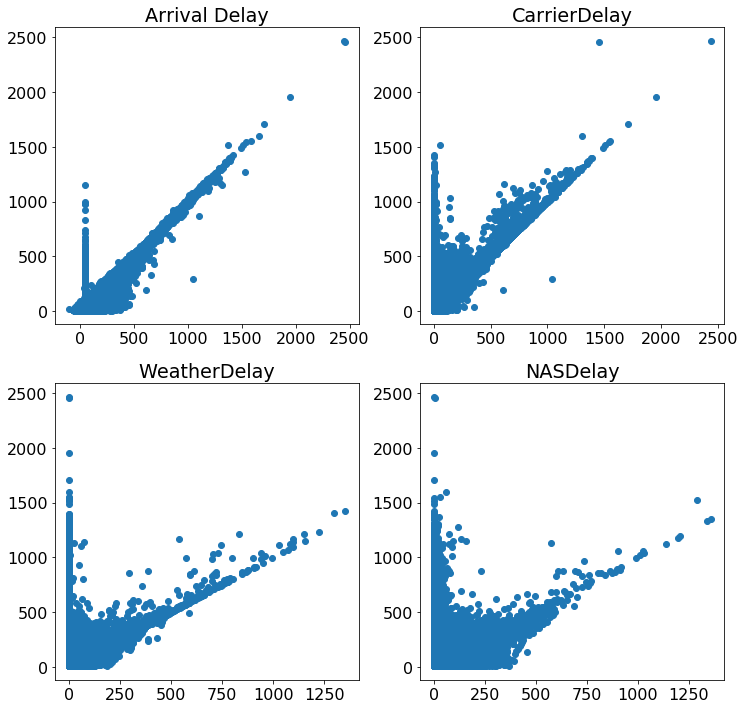

In [52]:
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.scatter(df_num_new2['ArrDelay'],df_num_new2['DepDelay'])
plt.title('Arrival Delay')
plt.subplot(2,2,2)
plt.scatter(df_num_new2['CarrierDelay'],df_num_new2['DepDelay'])
plt.title('CarrierDelay')
plt.subplot(2,2,3)
plt.scatter(df_num_new2['WeatherDelay'],df_num_new2['DepDelay'])
plt.title('WeatherDelay')
plt.subplot(2,2,4)
plt.scatter(df_num_new2['NASDelay'],df_num_new2['DepDelay'])
plt.title('NASDelay')

# Lasso Regularization

In [53]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas = np.arange(0.001,10,0.1))
model_cv= lasso_cv.fit(X_train,Y_train)
model_cv.alpha_

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.001

In [54]:
from sklearn.linear_model import Lasso
lasso_reg =Lasso(alpha=.001,random_state=0)
lasso_reg.fit(X_train,Y_train)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

# Training Set

In [55]:
y_pred_lasso = lasso_reg.predict(X_train)

In [56]:
rmse = np.sqrt(mean_squared_error(Y_train,y_pred_lasso))
r2 = r2_score(Y_train,y_pred_lasso)

In [57]:
print("Root mean squared error on training set", rmse)
print("R2 score on training set ", r2)

Root mean squared error on training set 14.800514624288924
R2 score on training set  0.9231462363390273


# Testing set

In [58]:
y_pred_lasso= lasso_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test,y_pred_lasso))
r2 = r2_score(Y_test,y_pred_lasso)

print("Root mean squared error on testing set", rmse)
print("R2 score on testing set ", r2)

Root mean squared error on testing set 14.865789103322076
R2 score on testing set  0.9226756066045385
